# STAT0032 GROUP PROJECT

## Objective
- study the distribution of cycle hire counts to gain a better understanding of how various external factors might impact the popularity of cycling in London.
- The outcome should be a report describing the analysis performed, including any statistical tools used as well as (non-technical) recommendations for Transport for London. 
- Transport for London is particularly keen to gain a greater understanding of how much demand to expect during peak commuting hours in the evening.

The report should include:
- Goodness-of-fit Test: A study of the distribution of bikes hires during peak commuting times in the evening in spring and summer. e.g. **The chi-square Test, likelihood ratio Test, Lilliefors' Test, Anderson-Darling Test. Shapiro-Wilk Test**
- Two-sample tests: A study of how the distribution of bike usage differs during spring and summer. e.g. **Kolmogorov-Smirnov Test**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy.stats import chisquare, norm, probplot, chi2, kstest, anderson, shapiro, gamma, beta
from statsmodels.stats.diagnostic import lilliefors

## Import Data
~~two files: hour.csv for analyzing cnt at peak commuting hours in the evening? day.csv for having a global understanding of cnt?~~

In [2]:
df_hours = pd.read_csv("hour.csv")
df_days = pd.read_csv("day.csv")

In [3]:
df_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df_hours.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
df_hours.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' and 'weathersit' are actually categorical data values

In [7]:
df_hours['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
df_hours['yr'].unique()

array([0, 1], dtype=int64)

In [9]:
df_hours['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
df_hours['holiday'].unique()

array([0, 1], dtype=int64)

In [11]:
df_hours['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [12]:
df_hours['workingday'].unique()

array([0, 1], dtype=int64)

In [13]:
df_hours['weathersit'].unique()

array([1, 2, 3, 4], dtype=int64)

Convert the data types

In [14]:
df_hours['holiday']=df_hours['holiday'].astype(str)
df_hours['weekday']=df_hours['weekday'].astype(str)
df_hours['workingday']=df_hours['workingday'].astype(str)
df_hours['weathersit']=df_hours['weathersit'].astype(str)
df_hours['dteday']=pd.to_datetime(df_hours['dteday'])
df_hours['day'] = df_hours['dteday'].dt.day
# df_hours = df_hours.drop(['dteday'], axis = 1)
df_days['dteday']=pd.to_datetime(df_days['dteday'])
df_days['day'] = df_days['dteday'].dt.day
# df_days = df_days.drop(['dteday'], axis = 1)

## 1. Data Preprocessing

### Analysis Missing Data

In [15]:
df_hours.isnull ().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

### Outlier Analysis
1) using boxplot to detect the outliers in continuous data

<AxesSubplot:>

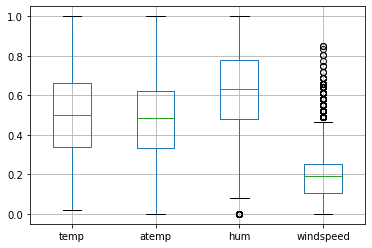

In [16]:
df_hours.boxplot(['temp','atemp','hum','windspeed'])

From the boxplot, it is clear that the data variables 'hum' and 'windspeed' contains outliers. To avoid the effect of extreme weather, we will delete the tuple containing outliers.
<span style="color:red">**handle outlier?**</span>

In [17]:
# handle outliers in hum
q75,q25 = np.percentile(df_hours.loc[:,"hum"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
df_hours.loc[df_hours["hum"] < min, 'hum'] = np.nan
print('min of hum', min)

# handle outliers in windspeed
q75,q25 = np.percentile(df_hours.loc[:,"windspeed"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
df_hours.loc[df_hours["windspeed"] > max, 'windspeed'] = np.nan
print('max of windspeed', max)

df_hours.isnull ().sum()

min of hum 0.029999999999999916
max of windspeed 0.4775


instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum            22
windspeed     342
casual          0
registered      0
cnt             0
day             0
dtype: int64

In [18]:
df_hours = df_hours.dropna(axis=0)

## 2.Data Exploration
<span style="color:red">**gain a greater understanding of how much demand to expect during peak commuting hours in the evening?**</span>

In [19]:
df_hours.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cnt'>

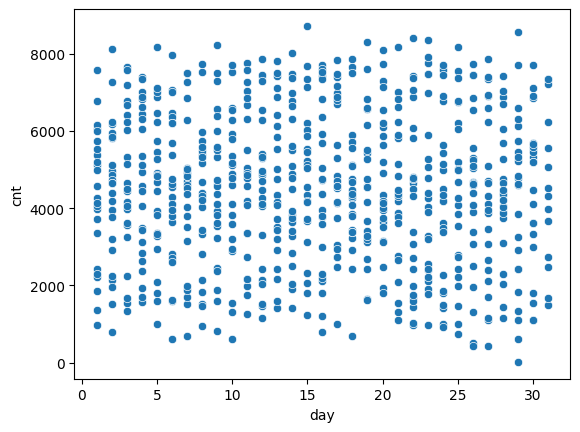

In [20]:
sns.scatterplot(x=df_days['day'], y=df_days['cnt'])

<AxesSubplot:xlabel='instant', ylabel='cnt'>

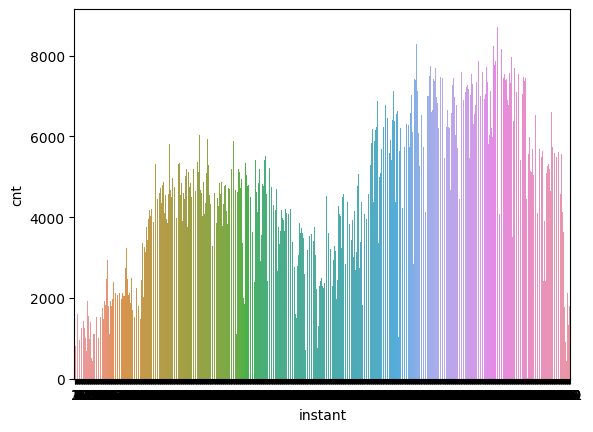

In [21]:
sns.barplot(x=df_days['instant'], y=df_days['cnt'])

<AxesSubplot:xlabel='instant', ylabel='cnt'>

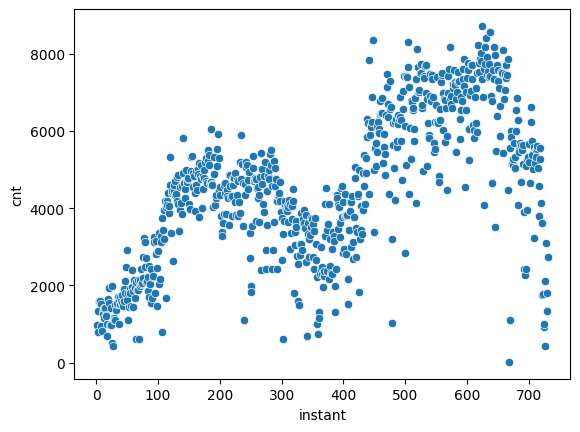

In [22]:
sns.scatterplot(x=df_days['instant'], y=df_days['cnt'])

<AxesSubplot:xlabel='season', ylabel='cnt'>

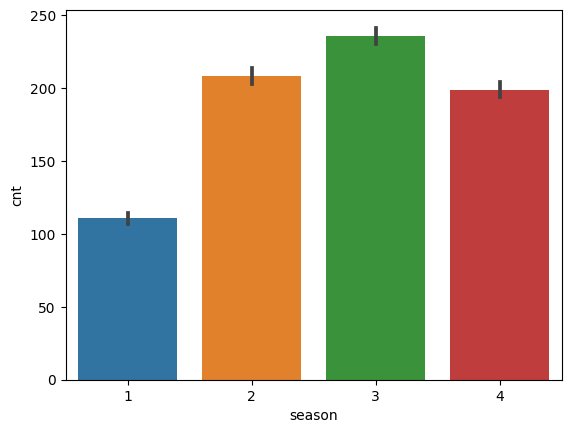

In [23]:
sns.barplot(x=df_hours['season'], y=df_hours['cnt'])

<AxesSubplot:xlabel='yr', ylabel='cnt'>

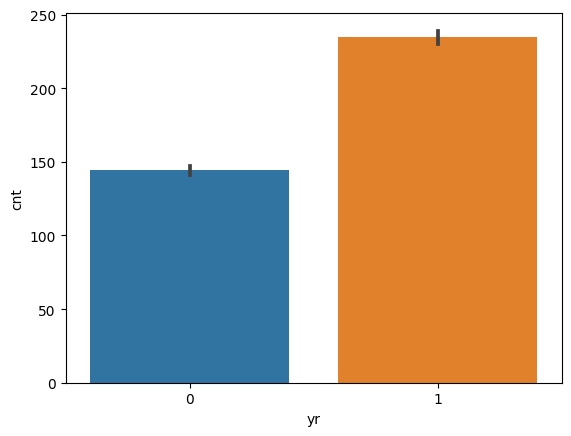

In [24]:
sns.barplot(x=df_hours['yr'], y=df_hours['cnt'])

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

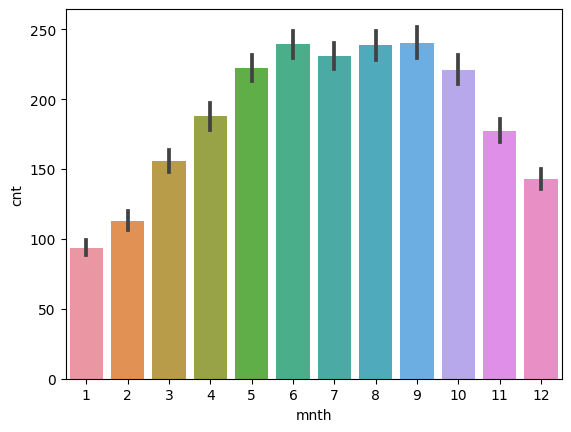

In [25]:
sns.barplot(x=df_hours['mnth'], y=df_hours['cnt'])

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

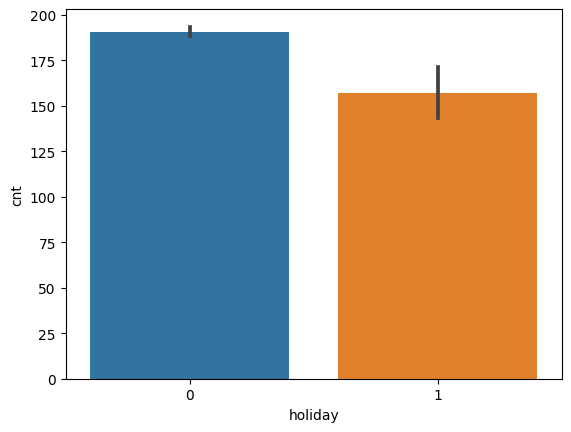

In [26]:
sns.barplot(x=df_hours['holiday'], y=df_hours['cnt'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

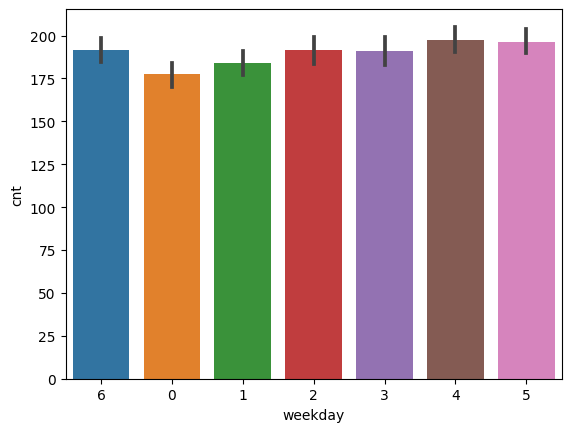

In [27]:
sns.barplot(x=df_hours['weekday'], y=df_hours['cnt'])

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

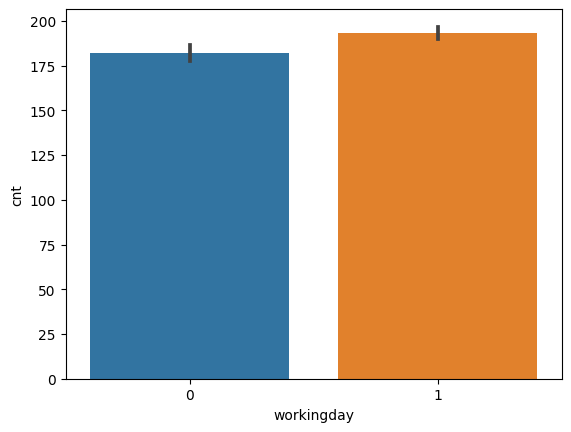

In [28]:
sns.barplot(x=df_hours['workingday'], y=df_hours['cnt'])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

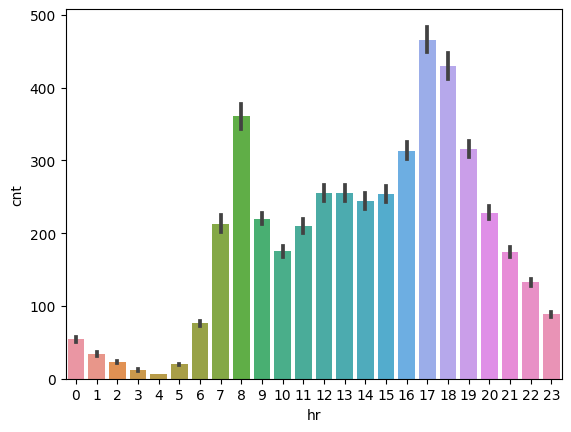

In [29]:
sns.barplot(x=df_hours['hr'], y=df_hours['cnt'])

<AxesSubplot:xlabel='hr', ylabel='cnt'>

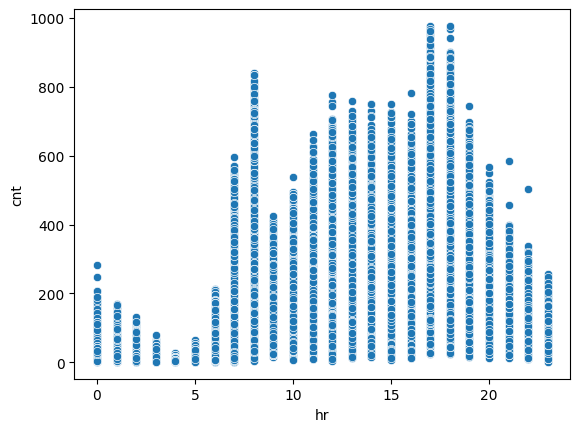

In [30]:
sns.scatterplot(x=df_hours['hr'], y=df_hours['cnt'])

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

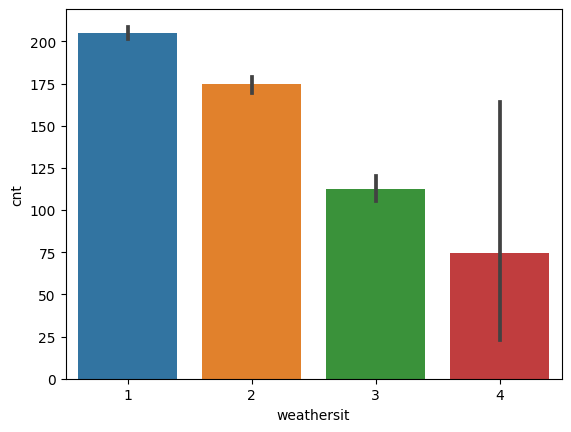

In [31]:
sns.barplot(x=df_hours['weathersit'], y=df_hours['cnt'])

<AxesSubplot:xlabel='temp', ylabel='cnt'>

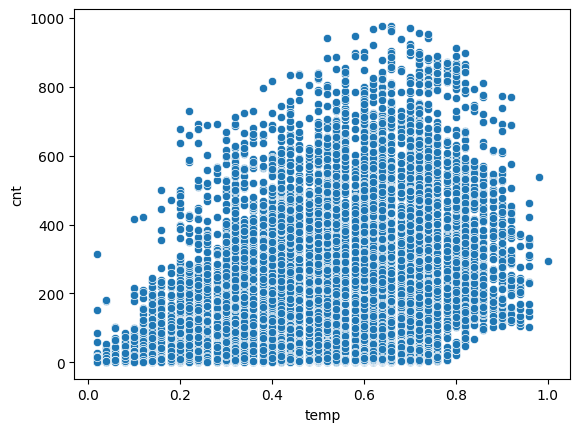

In [32]:
sns.scatterplot(x=df_hours['temp'], y=df_hours['cnt'])

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

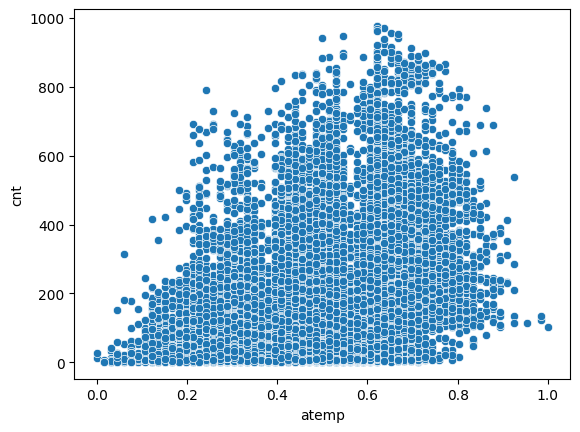

In [33]:
sns.scatterplot(x=df_hours['atemp'], y=df_hours['cnt'])

<AxesSubplot:xlabel='hum', ylabel='cnt'>

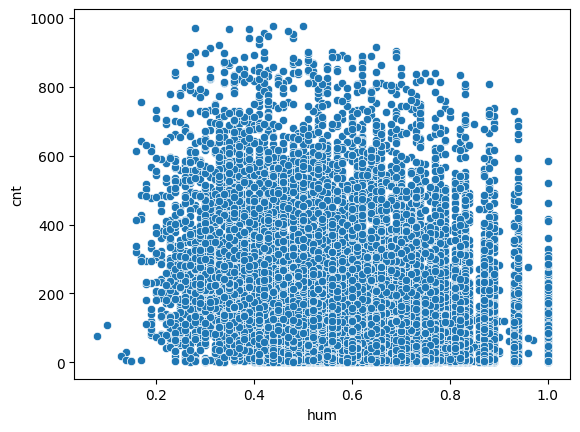

In [34]:
sns.scatterplot(x=df_hours['hum'], y=df_hours['cnt'])

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

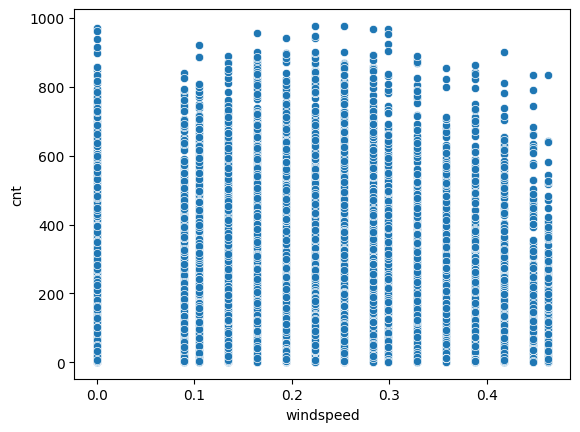

In [35]:
sns.scatterplot(x=df_hours['windspeed'], y=df_hours['cnt'])

<AxesSubplot:xlabel='season', ylabel='cnt'>

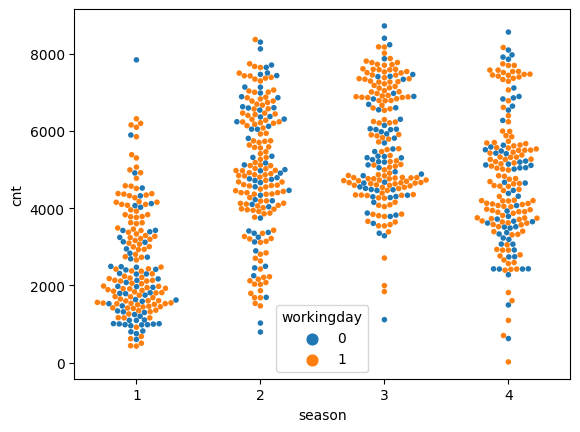

In [36]:
sns.swarmplot(x='season',y='cnt',data=df_days,hue='workingday',size=4)

<AxesSubplot:xlabel='season', ylabel='cnt'>

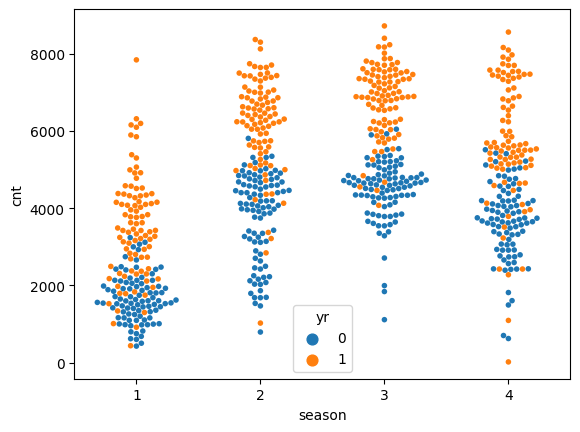

In [37]:
sns.swarmplot(x='season',y='cnt',data=df_days,hue='yr',size=4)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

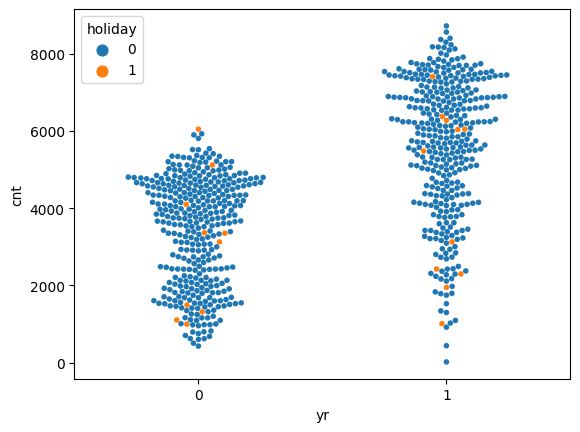

In [38]:
sns.swarmplot(x='yr',y='cnt',data=df_days,hue='holiday',size=4)

<AxesSubplot:xlabel='season', ylabel='cnt'>

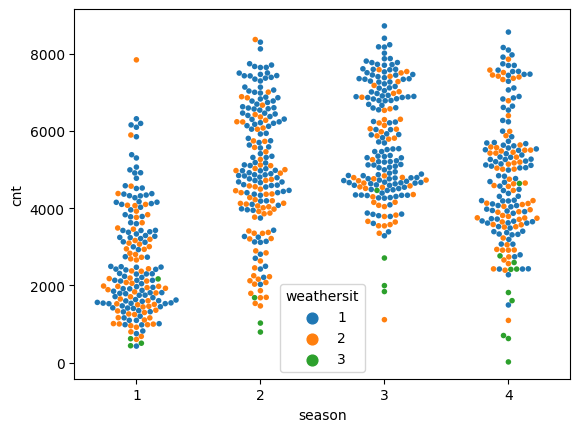

In [39]:
sns.swarmplot(x='season',y='cnt',data=df_days,hue='weathersit',size=4)

<AxesSubplot:xlabel='season', ylabel='cnt'>

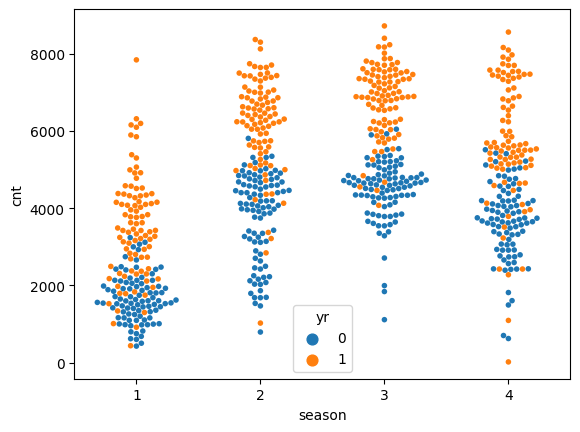

In [40]:
sns.swarmplot(x='season',y='cnt',data=df_days,hue='yr',size=4)

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

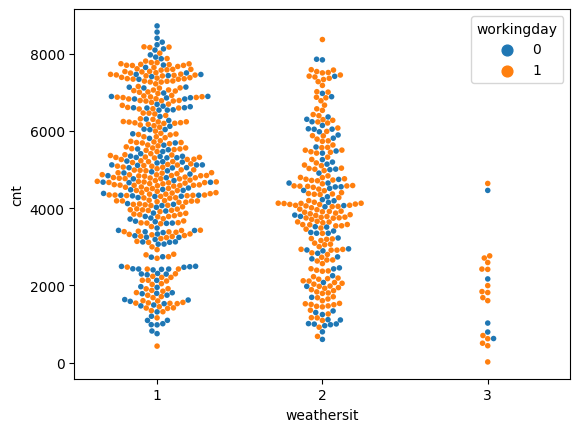

In [41]:
sns.swarmplot(x='weathersit',y='cnt',data=df_days,hue='workingday',size=4)

## 3. Feature Selection

In [19]:
df_spring_eveningPeak = df_hours[(df_hours['hr'] >= 16 ) & (df_hours['hr'] <= 19) & (df_hours['season'] == 1) & (df_hours['workingday'] == '1') & (df_hours['holiday'] == '0')] 
df_spring_eveningPeak = df_spring_eveningPeak.groupby(['dteday']).sum()
df_summer_eveningPeak = df_hours[(df_hours['hr'] >= 16 ) & (df_hours['hr'] <= 19) & (df_hours['season'] == 2) & (df_hours['workingday'] == '1') & (df_hours['holiday'] == '0')] 
df_summer_eveningPeak = df_summer_eveningPeak.groupby(['dteday']).sum()

In [20]:
df_spring_eveningPeak.head()

,instant,season,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,
2011-01-03,254,4,0,4,70,0.94,0.9849,1.39,0.5821,37,463,500,12
2011-01-04,346,4,0,4,70,1.08,1.0758,1.93,0.7761,30,559,589,16
2011-01-05,438,4,0,4,70,1.02,1.0455,1.42,0.5224,16,564,580,20
2011-01-06,530,4,0,4,70,0.92,0.9698,1.95,0.5523,29,504,533,24
2011-01-07,622,4,0,4,70,0.76,0.8940,1.69,0.3434,24,468,492,28


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

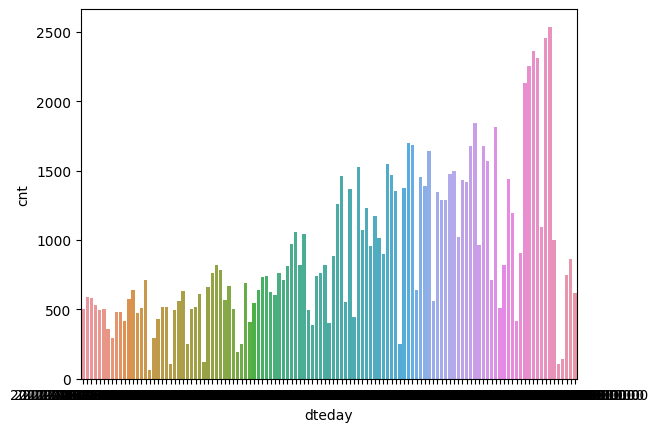

In [21]:
sns.barplot(x=df_spring_eveningPeak.index, y=df_spring_eveningPeak['cnt'])

(array([1., 2., 1., 1., 0., 1., 0., 3., 0., 2., 0., 1., 0., 3., 3., 1., 2.,
        8., 5., 3., 5., 1., 4., 4., 2., 1., 3., 4., 3., 1., 5., 0., 1., 2.,
        1., 0., 3., 1., 2., 1., 2., 1., 0., 0., 1., 1., 0., 1., 1., 2., 0.,
        0., 3., 2., 1., 2., 3., 2., 0., 1., 1., 1., 0., 1., 0., 3., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.]),
 array([  62.  ,   86.75,  111.5 ,  136.25,  161.  ,  185.75,  210.5 ,
         235.25,  260.  ,  284.75,  309.5 ,  334.25,  359.  ,  383.75,
         408.5 ,  433.25,  458.  ,  482.75,  507.5 ,  532.25,  557.  ,
         581.75,  606.5 ,  631.25,  656.  ,  680.75,  705.5 ,  730.25,
         755.  ,  779.75,  804.5 ,  829.25,  854.  ,  878.75,  903.5 ,
         928.25,  953.  ,  977.75, 1002.5 , 1027.25, 1052.  , 1076.75,
        1101.5 , 1126.25, 1151.  , 1175.75, 1200.5 , 1225.25, 1250.  ,
        1274.75, 1299.5 , 1324.25, 1349.  , 1373.75, 

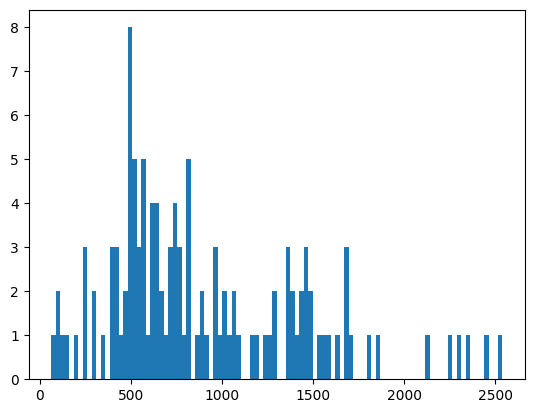

In [22]:
plt.hist(x=df_spring_eveningPeak['cnt'], bins=100)

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

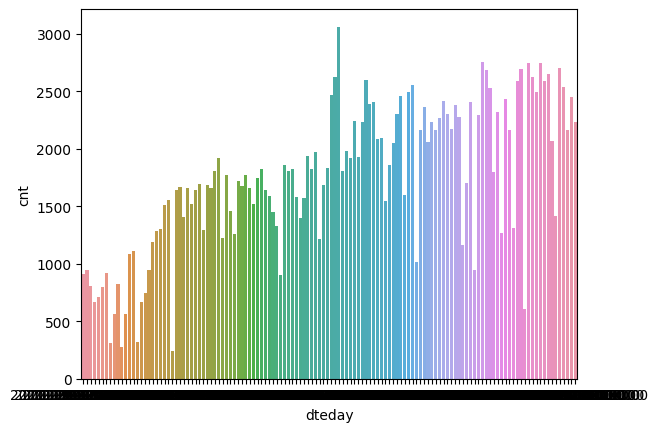

In [23]:
sns.barplot(x=df_summer_eveningPeak.index, y=df_summer_eveningPeak['cnt'])

(array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 2., 1.,
        1., 0., 1., 2., 0., 0., 2., 1., 3., 0., 1., 0., 1., 0., 1., 1., 1.,
        2., 0., 3., 3., 1., 0., 0., 3., 1., 1., 0., 3., 2., 3., 1., 3., 4.,
        4., 2., 1., 2., 4., 4., 2., 0., 3., 1., 2., 0., 0., 3., 2., 0., 0.,
        5., 0., 4., 1., 3., 2., 0., 2., 3., 2., 3., 1., 1., 2., 1., 3., 2.,
        1., 2., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 237.  ,  265.25,  293.5 ,  321.75,  350.  ,  378.25,  406.5 ,
         434.75,  463.  ,  491.25,  519.5 ,  547.75,  576.  ,  604.25,
         632.5 ,  660.75,  689.  ,  717.25,  745.5 ,  773.75,  802.  ,
         830.25,  858.5 ,  886.75,  915.  ,  943.25,  971.5 ,  999.75,
        1028.  , 1056.25, 1084.5 , 1112.75, 1141.  , 1169.25, 1197.5 ,
        1225.75, 1254.  , 1282.25, 1310.5 , 1338.75, 1367.  , 1395.25,
        1423.5 , 1451.75, 1480.  , 1508.25, 1536.5 , 1564.75, 1593.  ,
        1621.25, 1649.5 , 1677.75, 1706.  , 1734.25, 

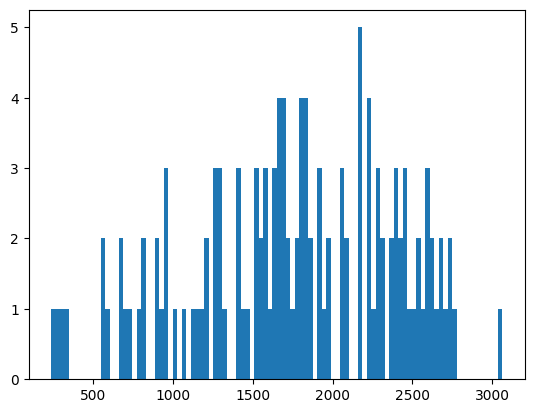

In [24]:
plt.hist(x=df_summer_eveningPeak['cnt'], bins=100)

## 3. Test of normality using Q-Q plot

<function matplotlib.pyplot.show(close=None, block=None)>

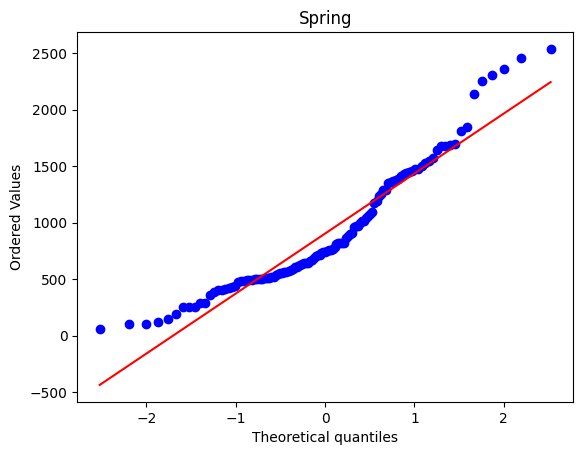

In [25]:
probplot(df_spring_eveningPeak['cnt'], dist="norm", plot=pylab)
pylab.title("Spring")
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

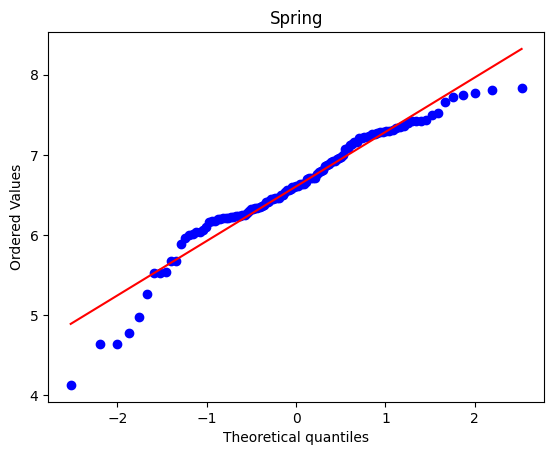

In [26]:
probplot(np.log(df_spring_eveningPeak['cnt']), dist="norm", plot=pylab)
pylab.title("Spring")
pylab.show

2.906846867276529 -30.17289425256576 321.21371397050734


<function matplotlib.pyplot.show(close=None, block=None)>

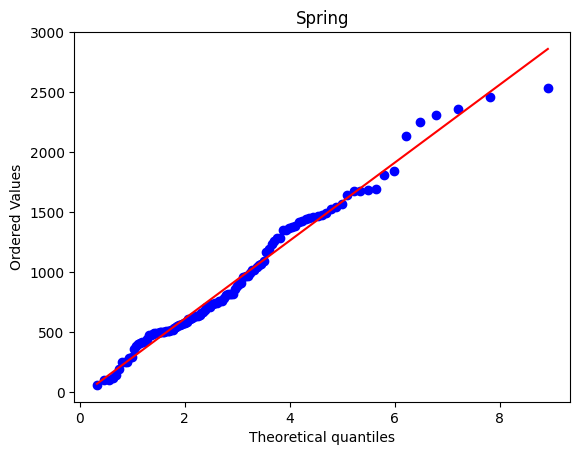

In [27]:
fit_alpha, fit_loc, fit_scale=gamma.fit(df_spring_eveningPeak['cnt'])
print(fit_alpha, fit_loc, fit_scale)
probplot(df_spring_eveningPeak['cnt'], sparams=([2.9]),dist="gamma",plot=pylab)
pylab.title("Spring")
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

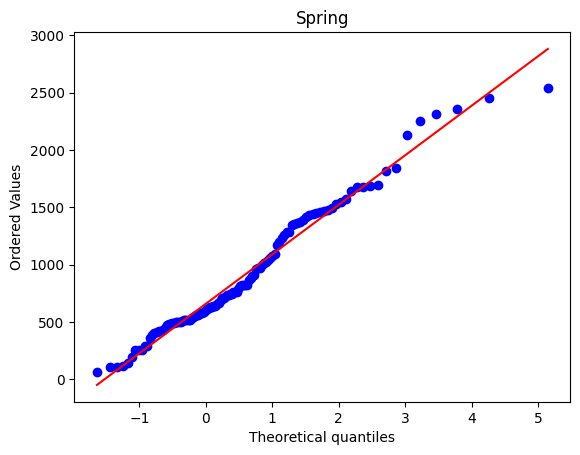

In [28]:
probplot(df_spring_eveningPeak['cnt'], dist="gumbel_r",plot=pylab)
pylab.title("Spring")
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

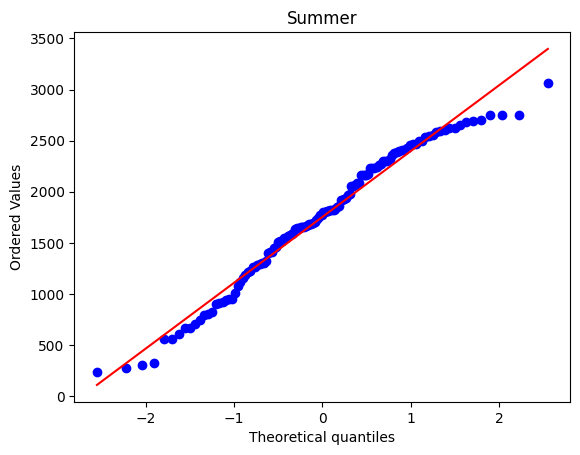

In [29]:
probplot(df_summer_eveningPeak['cnt'], dist="norm", plot=pylab)
pylab.title("Summer")
pylab.show

3.602960125814571 2.434687653962725 -302.3789813763222 3439.6227893520813


<function matplotlib.pyplot.show(close=None, block=None)>

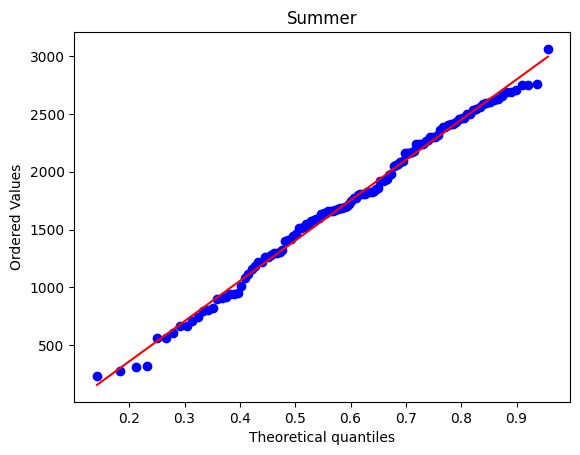

In [30]:
fit_alpha, fit_beta, fit_loc, fit_scale = beta.fit(df_summer_eveningPeak['cnt'])
print(fit_alpha, fit_beta, fit_loc, fit_scale)
probplot(df_summer_eveningPeak['cnt'], sparams=([3.6, 2.4]),dist="beta",plot=pylab)
pylab.title("Summer")
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

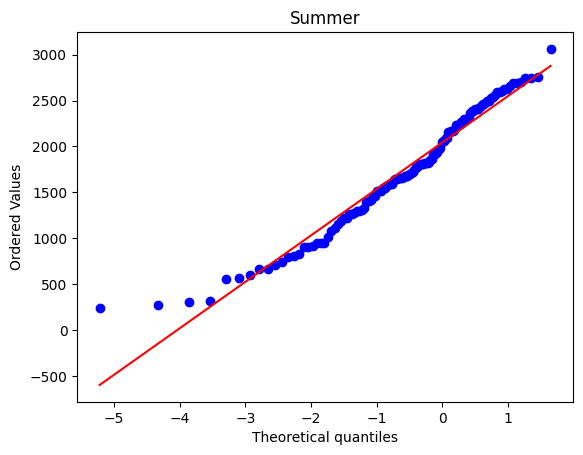

In [31]:
probplot(df_summer_eveningPeak['cnt'],dist="gumbel_l",plot=pylab)
pylab.title("Summer")
pylab.show

<span style="color:red">**how many test we need to use for one kind of data? compare the underlying assumptions of test?**</span>
## 4. Goodness-of-fit Test for Spring

### 4.1 Chi-square Goodness-of-fit Test (Normal Distribution)

In [32]:
bins = list(range(0,2601,200))

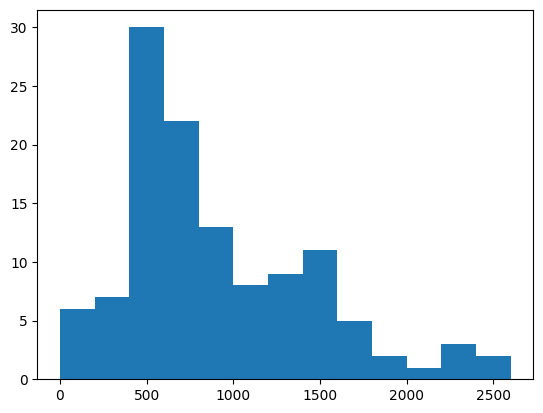

In [33]:
obs,bins,_ = plt.hist(x=df_spring_eveningPeak['cnt'], bins=bins)

In [34]:
obs, bins

(array([ 6.,  7., 30., 22., 13.,  8.,  9., 11.,  5.,  2.,  1.,  3.,  2.]),
 array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400, 2600]))

In [35]:
mid = [bins[i]/2 + bins[i-1]/2 for i in range(1,len(bins))]
mid = np.array(mid)
freq_table = pd.DataFrame(np.concatenate([bins[1:,np.newaxis],obs[:,np.newaxis],mid[:,np.newaxis]],1), columns=['up_to','freq','mid'])
freq_table['fx'] = freq_table['mid']*freq_table['freq']
freq_table['fx2'] = freq_table['mid']*freq_table['mid']*freq_table['freq']
freq_table

,up_to,freq,mid,fx,fx2
0,200.0,6.0,100.0,600.0,60000.0
1,400.0,7.0,300.0,2100.0,630000.0
2,600.0,30.0,500.0,15000.0,7500000.0
3,800.0,22.0,700.0,15400.0,10780000.0
4,1000.0,13.0,900.0,11700.0,10530000.0
5,1200.0,8.0,1100.0,8800.0,9680000.0
6,1400.0,9.0,1300.0,11700.0,15210000.0
7,1600.0,11.0,1500.0,16500.0,24750000.0
8,1800.0,5.0,1700.0,8500.0,14450000.0
9,2000.0,2.0,1900.0,3800.0,7220000.0


In [36]:
n = freq_table['freq'].sum()
mean = freq_table['fx'].sum()/n
var = (freq_table['fx2'].sum()-n*mean*mean)/(n-1)
n, mean, var

(119.0, 908.4033613445379, 299928.7850733513)

The mean and variance of the normal distribution is unknown, then we need to find from the sample data

the mean of sample data is 908 and the variance of the sample data is 299928

the null hypothesis is that the data is normally distributed using the sample mean and variance as estimates for the population mean and variance

Based on the assumption for the observed data and expected data for each cell should be larger than 5. We need to combine some cells

In [37]:
freq_table_normal = freq_table.iloc[:-4,:2]
freq_table_normal = freq_table_normal.append({'up_to':'over 1800','freq':8},ignore_index=True)
freq_table_normal

,up_to,freq
0,200.0,6.0
1,400.0,7.0
2,600.0,30.0
3,800.0,22.0
4,1000.0,13.0
5,1200.0,8.0
6,1400.0,9.0
7,1600.0,11.0
8,1800.0,5.0
9,over 1800,8.0


In [38]:
Exp_normal = norm(loc = mean, scale=np.sqrt(var))
freq_table_normal['P(a<x<=b)'] = freq_table_normal['freq']
freq_table_normal.loc[0,'P(a<x<=b)'] = Exp_normal.cdf(200)
n_class = freq_table_normal.shape[0]
for i in range(n_class)[1:-1]:
    freq_table_normal.loc[n_class-i-1,'P(a<x<=b)'] = Exp_normal.cdf(freq_table_normal.loc[n_class-i-1,'up_to'])-Exp_normal.cdf(freq_table_normal.loc[n_class-i-2,'up_to'])
freq_table_normal.loc[n_class-1,'P(a<x<=b)'] = 1-Exp_normal.cdf(1800)
freq_table_normal['Exp_Freq'] = freq_table_normal['P(a<x<=b)'] * n 
freq_table_normal['(O-E)^2/E'] = ((freq_table_normal['freq']-freq_table_normal['Exp_Freq'])**2)/freq_table_normal['Exp_Freq']
freq_table_normal

,up_to,freq,P(a<x<=b),Exp_Freq,(O-E)^2/E
0,200.0,6.0,0.097916,11.652059,2.741642
1,400.0,7.0,0.078703,9.365709,0.597560
2,600.0,30.0,0.110053,13.096269,21.818130
3,800.0,22.0,0.134873,16.049935,2.205820
4,1000.0,13.0,0.144868,17.239292,1.042479
5,1200.0,8.0,0.136377,16.228809,4.172413
6,1400.0,9.0,0.112519,13.389810,1.439186
7,1600.0,11.0,0.081364,9.682357,0.179314
8,1800.0,5.0,0.051565,6.136263,0.210404
9,over 1800,8.0,0.051760,6.159497,0.549956


In [39]:
df = n_class-1-2
chi2Test = freq_table_normal['(O-E)^2/E'].sum()
p = chi2.sf(chi2Test,df)
chi2Test, p

(34.95690518383804, 1.1394942554413911e-05)

In [40]:
# freq_table['Exp_Freq']=freq_table['freq'].astype(int)
chisquare(f_obs=np.array(freq_table_normal['freq']), f_exp=np.array(freq_table_normal['Exp_Freq']),ddof=2)

Power_divergenceResult(statistic=34.95690518383804, pvalue=1.1394942554413911e-05)

There is a strong evidence that the null hypothesis test is rejected.

### 4.2 Likelihood-ratio Test (Normal Distribution)

In [41]:
freq_table_normal['likelihood score'] = freq_table_normal['freq'] * np.log(freq_table_normal['freq']/freq_table_normal['Exp_Freq'])
G2 = freq_table_normal['likelihood score'].sum()*2
p = chi2.sf(G2,df)
G2, p

(30.702006672116177, 7.055431922318063e-05)

###  4.3 Lilliefors' test (Normal Distribution)
use KS statistic but the distribution of the test statistic reflect the effect of parameters estimation.

In [42]:
lilliefors(np.array(df_spring_eveningPeak['cnt']))

(0.14694036998257365, 0.0009999999999998899)

In [43]:
lilliefors(np.array(np.log(df_spring_eveningPeak['cnt'])))

(0.10001648859892176, 0.008162949110418205)

### 4.4 Shapiro-Wilk Test (Normal Distribution)

In [44]:
shapiro(np.array(df_spring_eveningPeak['cnt']))

ShapiroResult(statistic=0.9206129908561707, pvalue=2.8458669021347305e-06)

### 4.5 Anderson-Darling Test (Normal Distribution)
It is a modification of the Kolmogorov-Smirnov (K-S) test and gives more weight to the tails than does the K-S test

In [45]:
anderson(np.array(df_spring_eveningPeak['cnt']), dist='norm')

AndersonResult(statistic=3.0910297819935977, critical_values=array([0.558, 0.636, 0.763, 0.89 , 1.058]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### 4.6 Anderson-Darling Test (Gumbel Distribution)

In [46]:
anderson(np.array(df_spring_eveningPeak['cnt']), dist='gumbel_r')

AndersonResult(statistic=1.015476884068093, critical_values=array([0.465, 0.626, 0.743, 0.861, 1.019]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))

### 4.7 Anderson-Darling Test (Gamma Distribution)
https://www.real-statistics.com/statistics-tables/anderson-darling-test-table/

In [47]:
y = np.sort(df_spring_eveningPeak['cnt'])
fit_alpha, fit_loc, fit_scale=gamma.fit(df_spring_eveningPeak['cnt'])
logcdf = gamma.logcdf(y,fit_alpha, fit_loc, fit_scale)
logsf = gamma.logsf(y,fit_alpha, fit_loc, fit_scale)
i = np.arange(1, n+1)
A2 = -n - np.sum((2*i - 1.0) / n * (logcdf + logsf[::-1]), axis=0)
A2 = A2+(0.2+0.3/fit_alpha)/n
critical = (0.475, 0.639, 0.762, 0.886, 1.052)
sig = (25., 10., 5., 2.5, 1.)
fit_alpha, A2,  critical, sig

(2.906846867276529,
 0.7676232025266857,
 (0.475, 0.639, 0.762, 0.886, 1.052),
 (25.0, 10.0, 5.0, 2.5, 1.0))

## 5. Goodness-of-fit Test for Summer

### 5.1 Chi-square Goodness-of-fit Test (Normal Distribution)

In [53]:
bins = list(range(0,3201,200))

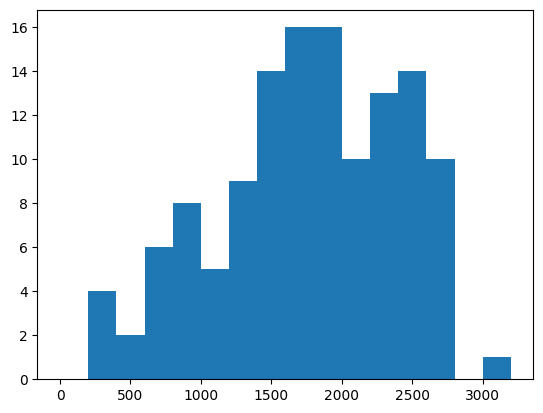

In [54]:
obs,bins,_ = plt.hist(x=df_summer_eveningPeak['cnt'], bins=bins)

In [55]:
obs, bins

(array([ 0.,  4.,  2.,  6.,  8.,  5.,  9., 14., 16., 16., 10., 13., 14.,
        10.,  0.,  1.]),
 array([   0,  200,  400,  600,  800, 1000, 1200, 1400, 1600, 1800, 2000,
        2200, 2400, 2600, 2800, 3000, 3200]))

In [56]:
mid = [bins[i]/2 + bins[i-1]/2 for i in range(1,len(bins))]
mid = np.array(mid)
freq_table = pd.DataFrame(np.concatenate([bins[1:,np.newaxis],obs[:,np.newaxis],mid[:,np.newaxis]],1), columns=['up_to','freq','mid'])
freq_table['fx'] = freq_table['mid']*freq_table['freq']
freq_table['fx2'] = freq_table['mid']*freq_table['mid']*freq_table['freq']
freq_table

,up_to,freq,mid,fx,fx2
0,200.0,0.0,100.0,0.0,0.0
1,400.0,4.0,300.0,1200.0,360000.0
2,600.0,2.0,500.0,1000.0,500000.0
3,800.0,6.0,700.0,4200.0,2940000.0
4,1000.0,8.0,900.0,7200.0,6480000.0
5,1200.0,5.0,1100.0,5500.0,6050000.0
6,1400.0,9.0,1300.0,11700.0,15210000.0
7,1600.0,14.0,1500.0,21000.0,31500000.0
8,1800.0,16.0,1700.0,27200.0,46240000.0
9,2000.0,16.0,1900.0,30400.0,57760000.0


In [57]:
n = freq_table['freq'].sum()
mean = freq_table['fx'].sum()/n
var = (freq_table['fx2'].sum()-n*mean*mean)/(n-1)
n, mean, var

(128.0, 1760.9375, 417359.7440944882)

In [58]:
freq_table_normal = freq_table.iloc[2:-3,:2]
freq_table_normal.iloc[0,1] = 6
freq_table_normal = freq_table_normal.append({'up_to':'over 2600','freq':11},ignore_index=True)
freq_table_normal

,up_to,freq
0,600.0,6.0
1,800.0,6.0
2,1000.0,8.0
3,1200.0,5.0
4,1400.0,9.0
5,1600.0,14.0
6,1800.0,16.0
7,2000.0,16.0
8,2200.0,10.0
9,2400.0,13.0


In [59]:
Exp_normal = norm(loc = mean, scale=np.sqrt(var))
freq_table_normal['P(a<x<=b)'] = freq_table_normal['freq']
freq_table_normal.loc[0,'P(a<x<=b)'] = Exp_normal.cdf(600)
n_class = freq_table_normal.shape[0]
for i in range(n_class)[1:-1]:
    freq_table_normal.loc[n_class-i-1,'P(a<x<=b)'] = Exp_normal.cdf(freq_table_normal.loc[n_class-i-1,'up_to'])-Exp_normal.cdf(freq_table_normal.loc[n_class-i-2,'up_to'])
freq_table_normal.loc[n_class-1,'P(a<x<=b)'] = 1-Exp_normal.cdf(2600)
freq_table_normal['Exp_Freq'] = freq_table_normal['P(a<x<=b)'] * n 
freq_table_normal['(O-E)^2/E'] = ((freq_table_normal['freq']-freq_table_normal['Exp_Freq'])**2)/freq_table_normal['Exp_Freq']
freq_table_normal

,up_to,freq,P(a<x<=b),Exp_Freq,(O-E)^2/E
0,600.0,6.0,0.036166,4.629249,0.405888
1,800.0,6.0,0.032283,4.132240,0.844222
2,1000.0,8.0,0.050977,6.525063,0.333397
3,1200.0,5.0,0.073195,9.368918,2.037316
4,1400.0,9.0,0.095563,12.232093,0.854018
5,1600.0,14.0,0.113451,14.521774,0.018748
6,1800.0,16.0,0.122472,15.676409,0.006680
7,2000.0,16.0,0.120219,15.387987,0.024341
8,2200.0,10.0,0.107304,13.734892,1.015619
9,2400.0,13.0,0.087090,11.147477,0.307858


In [60]:
df = n_class-1-2
chi2Test = freq_table_normal['(O-E)^2/E'].sum()
p = chi2.sf(chi2Test,df)
chi2Test, p

(10.061017607958824, 0.34556812185729696)

In [61]:
chisquare(f_obs=np.array(freq_table_normal['freq']), f_exp=np.array(freq_table_normal['Exp_Freq']),ddof=2)

Power_divergenceResult(statistic=10.061017607958824, pvalue=0.34556812185729696)

### 5.2 Likelihood-ratio Test (Normal Distribution)

In [62]:
freq_table_normal['likelihood score'] = freq_table_normal['freq'] * np.log(freq_table_normal['freq']/freq_table_normal['Exp_Freq'])
G2 = freq_table_normal['likelihood score'].sum()*2
p = chi2.sf(G2,df)
G2, p

(9.7933839185464, 0.36746959067105306)

### 5.3 Lilliefors' test (Normal Distribution)

In [64]:
lilliefors(np.array(df_summer_eveningPeak['cnt']))

(0.07174630554183425, 0.1502317953412745)

### 5.4 Shapiro-Wilk Test (Normal Distribution)

In [66]:
anderson(np.array(df_summer_eveningPeak['cnt']), dist='norm')

AndersonResult(statistic=0.830288741027772, critical_values=array([0.559, 0.637, 0.764, 0.892, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### 5.5 Anderson-Darling Test (Normal Distribution)

In [67]:
anderson(np.array(df_summer_eveningPeak['cnt']), dist='norm')

AndersonResult(statistic=0.830288741027772, critical_values=array([0.559, 0.637, 0.764, 0.892, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### 5.6 Anderson-Darling Test (Gumbel Distribution)

In [70]:
anderson(np.array(df_summer_eveningPeak['cnt']), dist='gumbel_l')

AndersonResult(statistic=0.6900007564268549, critical_values=array([0.466, 0.626, 0.744, 0.862, 1.02 ]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ]))